In [3]:
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.stats.weightstats as ze
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
'''Sample question: your company wants to improve sales. 
Past sales data indicate that the average sale was $100 per transaction. After training your sales force, 
recent sales data (taken from a sample of 25 salesmen) indicates an average sale of $130, 
with a standard deviation of $15. Did the training work? Test your hypothesis at a 5% alpha level.
'''

In [95]:
#useful Data
Population_mean=100 
sample_mean=130
sample_size=25
sample_std=15

In [ ]:
# t-Test
#H0 :in Population mean no diffrence  mu=100
#H1:in Population mean diffrence occur mu!=100
# one Tailed Test 
alpha=0.05 #signification level
se=sample_std/np.sqrt(sample_size)
print("Standard error of mean:",se)
me=st.t.ppf(0.95,df=sample_size-1)*se
print("margin of error:",me)
stcf=st.t.ppf(0.95,df=sample_size-1)
stcf=(-stcf,stcf)
print("Standard Confidence Interval:",stcf)
t_score=(sample_mean-Population_mean)/se


cf=(Population_mean-me,Population_mean+me)
print("Actual Confidence interval:",cf)
print("t-Test_Score:",t_score)
t_score=abs(t_score)
p_value=(1-st.t.cdf(t_score,df=(sample_size-1)))
print("P-value: two tailed test:",2*p_value)
print('P-value: one tailed test',p_value)


if(p_value<0.05):
    print("Null Hypothesis reject(one tailed test)")
else:
    print("we fail to reject Null Hypothesis(one tailed test)")


    

<b> Two Sample Mean (Diffrent Mean)</b>



In [ ]:
'''Let’s suppose that a student wants to figure out if biology professors or English professors know more memes.
The student writes a meme quiz and springs it on 14 unsuspecting biology professors and 18 unsuspecting English professors during office hours.'''

In [4]:
biology =[3, 7, 11, 0, 7, 0, 4, 5, 6, 2, 4, 7, 2, 9]
english =[8, 5, 4, 10, 4, 5, 7, 2, 6, 1, 2, 7, 0, 6, 4, 12, 5, 2]

<b> Normally Data Distribute or not</b>

<b> Method 1:skewness</b>

In [89]:
print("biology skewness",st.skew(biology))
print("english skewness",st.skew(english))

biology skewness 0.1841172836475505
english skewness 0.48482133398713123


   <ul>
   <li> If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.</li>
   <li> If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.</li>
   <li> If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed</li>
    </ul>

<b> Method 2: Q-Q plot</b>

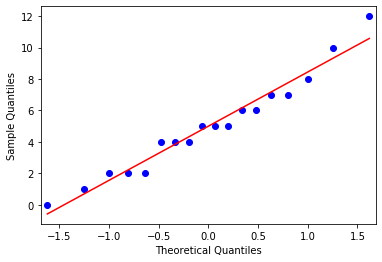

In [92]:
sm.qqplot(np.array(english),line='r')
plt.show()

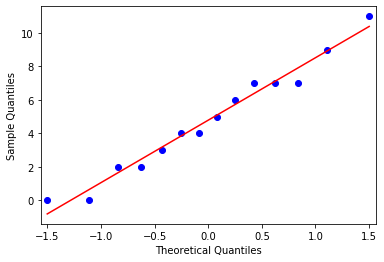

In [93]:
sm.qqplot(np.array(biology),line='r')
plt.show()

<b> Optional 2 sample quantile Compare </b>

In [90]:
x=0
q_list=[]
m=(1/len(biology))
for i in range(len(biology)):
    x = round(np.quantile(english,m),3)
    m=m+(1/len(biology))
    q_list.append(x)

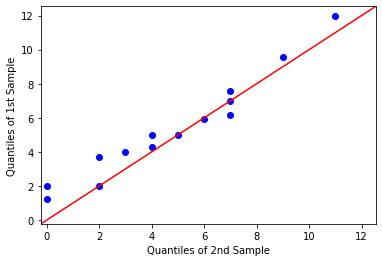

In [82]:
sm.qqplot_2samples(np.array(q_list),np.array(biology),line='45')
# sm.qqplot(np.array(biology))
plt.show()

<b> Method 3:Histogram </b>

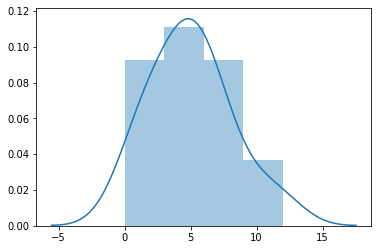

In [32]:
sns.distplot(english)

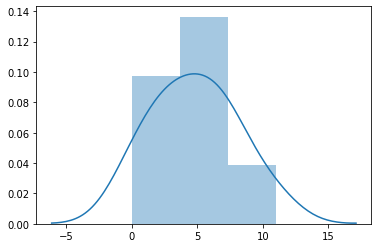

In [83]:
sns.distplot(biology)

In [ ]:
#useful data
b_mean=np.mean(biology)
e_mean=np.mean(english)
b_std=np.std(biology)
e_std=np.std(english)
b_n1=len(biology)
e_n2=len(english)

In [ ]:
# t-test 
# H0 both professor equally know about memes
#H1 Not equallity 
# two tailed test

alpha=0.05

t_star=st.t.ppf(0.975,df=b_n1+e_n2-2)

print("T Star:",t_star)
# Here 2 sample standard deviation  equally like so here used pooled approach
se=((b_n1-1)*(b_std**2)+(e_std**2)*(e_n2-1))/(b_n1+e_n2-1)

se=np.sqrt(se)*np.sqrt((1/b_n1)+(1/e_n2))
print("standard error of mean:",se)

me=t_star*se
print("Marign of erro:",me)
stcf=(-t_star,t_star)
print("standard Confidence Interval:",stcf)
x=(b_mean-e_mean)
cf=(x-me,x+me)

print("Actual Confidence Interval:",cf)
t_score=(b_mean-e_mean)/se
print("T Score",t_score)
p_value=2*(1-st.t.cdf(abs(t_score),df=b_n1+e_n2-2)) 
print("P_value:",p_value)
if(p_value<0.05):
    print("Null Hypothesis reject")
else:
    print("Fail to reject Null Hypothesis")

In [137]:
# another method  
ze.ttest_ind(biology,english,usevar='pooled',alternative='smaller')


(-0.18941702498737376, 0.42552086143675766, 30.0)

<b> Paired data </b>

In [ ]:
'''A cross-over trial investigated whether eating oat bran lowered serum cholesterol levels.
Fourteen (14) individuals were randomly assigned a diet that included either oat branor corn flakes.
After two weeks on the initial diet,  serum cholesterol were measured and the participants were then “crossed-over” to the alternate diet.
After two-weeks on the second diet, cholesterol levels were once again recorded. Data appear below. The variable CORNFLK in the table represents cholesterol level (mmol/L) of the participant on the corn flake diet. 
The variable OATBRAN represents the participant’s cholesterol on the oat bran diet.'''

In [1]:
Cornflik = []
st = "4.616.425.404.543.983.825.014.343.804.565.353.892.254.24"
st2 = '3.845.575.854.803.682.964.413.723.493.845.263.731.844.14'


i = 0
Oatbran = []
diff=[]
while(i < len(st)):
    Cornflik.append(float(st[i:i+4]))
    Oatbran.append(float(st2[i:i+4]))
    diff.append(float(st[i:i+4])-float(st2[i:i+4]))
    i = i+4

In [4]:
#step 1:Data Random sampling or not
#here Indivual Person select so data random sampling
#step 2:Data Normal Distributed  or note
print(st.skew(Cornflik))
print(st.skew(Oatbran))
print(st.skew(diff))

-0.15922138878441658
-0.14577438633188927
-0.5297280351041539


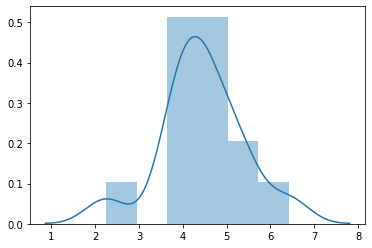

In [39]:
sns.distplot(Cornflik) 

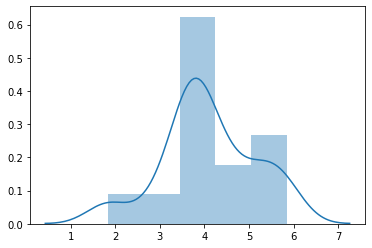

In [28]:
sns.distplot(Oatbran)

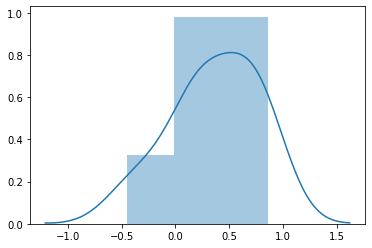

In [5]:
sns.distplot(diff)

In [ ]:
#Here Data look fairly Normal Distributed


In [8]:
#Collecting Data for test
C_mean=np.mean(Cornflik)
O_mean=np.mean(Oatbran)
sd=np.std(diff)
C_sample_size=len(Cornflik)
O_sample_size=len(Oatbran)

In [18]:
# H0 There Is No Diffrence C_mean=O_mean
# H1 There Is Diffrence C_mean > O_mean
t_star = st.t.ppf(1-0.05, df=C_sample_size-1)
alpha = 0.05
# one tailed test
print("T-Star:", t_star)
stcf = (-t_star, t_star)

print("Standard Confidence Interval:", stcf)
se = sd/np.sqrt(C_sample_size)
print("Standard error of the mean:", se)
me = t_star*se

t_score = (C_mean-O_mean)/se
print("T-Score:", t_score)
p_value = 1-st.t.cdf(t_score, df=C_sample_size-1)
print("p-value:", p_value)

print("Margin error of the mean:", me)
cf = ((C_mean-O_mean)-me, (C_mean-O_mean)+me)
print("Actual Confidence Interval:", cf)
if(p_value < 0.05):
    print("Null Hypothesis reject")
else:
    print("Fail to reject Null Hypothesis")

T-Star: 1.7709333959867988
Standard Confidence Interval: (-1.7709333959867988, 1.7709333959867988)
Standard error of the mean: 0.10455165977966205
T-Score: 3.4706014578998468
p-value: 0.002070553436829936
Margin error of the mean: 0.18515402590965332
Actual Confidence Interval: (0.17770311694749055, 0.5480111687667972)
Null Hypothesis reject


In [47]:
#Here my Mistakes because of here i Was treate data like independent data(Please do not go this test) 
#H0 There Is No Diffrence C_mean=O_mean
#H1 There Is Diffrence C_mean > O_mean
alpha=0.05
# one tailed test
t_star=st.t.ppf(0.95,df=C_sample_size+O_sample_size-2)
print("T_Star:",t_star)
stcf=(-t_star,t_star)
print("Standard Confidence Interval:",stcf)
se=((C_sample_size-1)*(C_std**2)+(O_std**2)*(O_sample_size-1))/(C_sample_size+O_sample_size-2)

se=np.sqrt(se)*np.sqrt((1/C_sample_size)+(1/O_sample_size))
print("standard error of mean:",se)
print("Margin of error:",t_star*se)
me=t_star*se

t_score=(C_mean-O_mean)/se
print("T_Score:",t_score)
t_score=abs(t_score)

cf=((C_mean-O_mean)-me, (C_mean-O_mean)+me)
print("Actual Confidence Interval:",cf)
P_value=1-st.t.cdf(t_score,df=C_sample_size+O_sample_size-2)
if(P_value<0.05):
    print("Null Hypothesis reject")
else:
    print("Fail to reject Null Hypothesis")
    

T_Star: 1.7056179197592727
Standard Confidence Interval: (-1.7056179197592727, 1.7056179197592727)
standard error of mean: 0.3692657792748202
Margin of error: 0.6298263302850056
T_Score: 0.9826449219576701
Actual Confidence Interval: (-0.2669691874278617, 0.9926834731421494)
Fail to reject Null Hypothesis


28